In [0]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

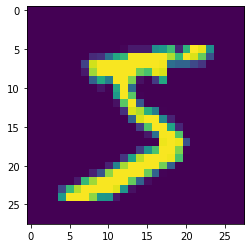

In [0]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])


In [0]:
x_train=x_train/255
x_test=x_test/255
model=tf.keras.models.Sequential([
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(512,activation=tf.nn.relu),
 tf.keras.layers.Dense(10,activation=tf.nn.softmax)                                 
])

In [0]:
model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.2012 - acc: 0.9405
Epoch 2/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0810 - acc: 0.9756
Epoch 3/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.0531 - acc: 0.9835
Epoch 4/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0366 - acc: 0.9879
Epoch 5/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0285 - acc: 0.9909
Epoch 6/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0210 - acc: 0.9932
Epoch 7/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.0188 - acc: 0.9940
Epoch 8/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0147 - acc: 0.9951
Epoch 9/10
60000/60000 [==============================] - 7s 115us/sampl

In [0]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 56us/sample - loss: 0.0870 - acc: 0.9783


[0.08701761008217294, 0.9783]

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.02):
      print("\nReached 98% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
model.fit(x_train, y_train, epochs=10,callbacks=[callbacks])

Train on 60000 samples
Epoch 1/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.0093 - acc: 0.9968
Reached 98% accuracy so cancelling training!
60000/60000 [==============================] - 7s 112us/sample - loss: 0.0093 - acc: 0.9968


7


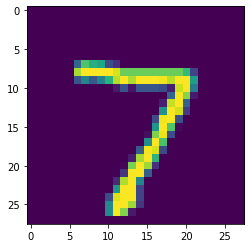

In [0]:
plt.imshow(x_test[0])
print(y_test[0])

In [0]:
# Using convolutional neural network
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255
test_images=test_images/255


In [13]:
print(training_images.shape)
print(training_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [14]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [0]:

training_images = training_images.reshape(60000,28,28,1)
test_images = test_images.reshape(10000,28,28,1)

In [16]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.005):
      print("\nReached 99.8% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=20,callbacks=[callbacks])

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 81s 1ms/sample - loss: 0.1178 - acc: 0.9650
Epoch 2/20
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.0381 - acc: 0.9883
Epoch 3/20
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.0264 - acc: 0.9913
Epoch 4/20
60000/60000 [==============================] - 79s 1ms/sample - loss: 0.0185 - acc: 0.9940
Epoch 5/20
60000/60000 [==============================] - 81s 1ms/sample - loss: 0.0142 - acc: 0.9953
Epoch 6/20
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.0119 - acc: 0.9958
Epoch 7/20
60000/60000 [==============================] - 79s 1ms/sample - loss: 0.0090 - acc: 0.9971
Epoch 8/20
60000/60000 [==============================] - 79s 1ms/sample - loss: 0.0083 - acc: 0.9971
Epoch 9/20
60000/60000 [==============================] - 79s 1ms/sample - loss: 0.0075 - acc: 0.9978
Epoch 10/20
60000/60000 [==============================] - 